<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.1-RNA/blob/main/Atividade_2_1_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalhamento da Atividade

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics
import unicodedata
import io
import random

In [112]:
!git clone https://github.com/AllanHigorLP/Atividade_avaliativa-2.1-RNA/

fatal: destination path 'Atividade_avaliativa-2.1-RNA' already exists and is not an empty directory.


In [113]:
df = np.fromfile('/content/Atividade_avaliativa-2.1-RNA/data/dataAll.txt')
print(df)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


In [114]:
df.shape

(3000,)

In [115]:
df = df.reshape(1000, 3)
print(df)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


#Função para Gerar Valores Aleatorios Uniformemente Distribuidos

In [116]:
def random_weights(min,max):
  w = np.random.uniform(min, max, size=3)
  w = np.round(w,4)
  return w

# Parte I – Resolvendo um Problema Linearmente Separável

In [117]:
# n (taxa de aprendizado)
theta = 0.0
n = 0.1
bias = 1.0


In [118]:
weight = random_weights(-0.5,0.5)
print(weight)

[-0.0675  0.1774 -0.062 ]


In [119]:
epoca = 0
erros = 1
ajustes_total = 0
ajustes_epoca = 0

def soma_ponderada():
    sum_pond = (weight[0]*(-1*bias)) + (weight[1]*example[0]) + (weight[2]*example[1])
    return sum_pond 

def funcao_ativacao():
    if u >= theta:
        return 1.0
    else:
        return 0.0

def novo_peso(w, fu_ac):
    e = example[2] - fu_ac
    novo_p = w + (n*e*np.array([(-1*bias), example[0], example[1]]))
    novo_p = np.round(novo_p,4)
    return novo_p
    
while (erros != 0):
    epoca = epoca + 1
    ajustes_epoca = 0
    erros = 0
    
    for example in df:
        funct_act = 0.0
        u = 0.0
        u = soma_ponderada()
        funct_act = funcao_ativacao()
        
        if funct_act != example[2]:
            ajustes_epoca = ajustes_epoca + 1
            ajustes_total = ajustes_total + 1
            erros = 1
            weight = novo_peso(weight, funct_act)
            print("Novo vetor de pesos ajustado", weight, "\n")
            
    print("Qtd de ajustes do vetor de pesos na época", epoca, ":", ajustes_epoca, "\n")
    
print("\nVetor de pesos final (ajustado): ", weight)
print("Número total de ajustes do vetor de pesos:", ajustes_total)
print("Número total de epocas:", epoca)

Novo vetor de pesos ajustado [ 3.25000e-02 -5.34817e+01 -7.65578e+01] 

Novo vetor de pesos ajustado [ -0.0675  19.3143 -40.7282] 

Novo vetor de pesos ajustado [ -0.1675 101.913   39.1276] 

Novo vetor de pesos ajustado [-6.750000e-02  1.077588e+02 -3.916700e+01] 

Novo vetor de pesos ajustado [ 3.250000e-02  6.774990e+01 -1.170597e+02] 

Novo vetor de pesos ajustado [  0.1325 126.1928 -75.4794] 

Novo vetor de pesos ajustado [ 3.250000e-02  7.323270e+01 -1.323489e+02] 

Novo vetor de pesos ajustado [ 1.325000e-01  1.327922e+02 -8.222660e+01] 

Novo vetor de pesos ajustado [ 3.250000e-02  8.726760e+01 -1.478625e+02] 

Novo vetor de pesos ajustado [ 1.325000e-01  1.016060e+02 -1.384763e+02] 

Novo vetor de pesos ajustado [  0.2325 192.3219 -63.763 ] 

Novo vetor de pesos ajustado [ 1.325000e-01  1.345409e+02 -1.240712e+02] 

Novo vetor de pesos ajustado [ 3.250000e-02  8.463110e+01 -1.753316e+02] 

Novo vetor de pesos ajustado [-6.750000e-02  1.124548e+02 -1.572767e+02] 

Novo vetor de

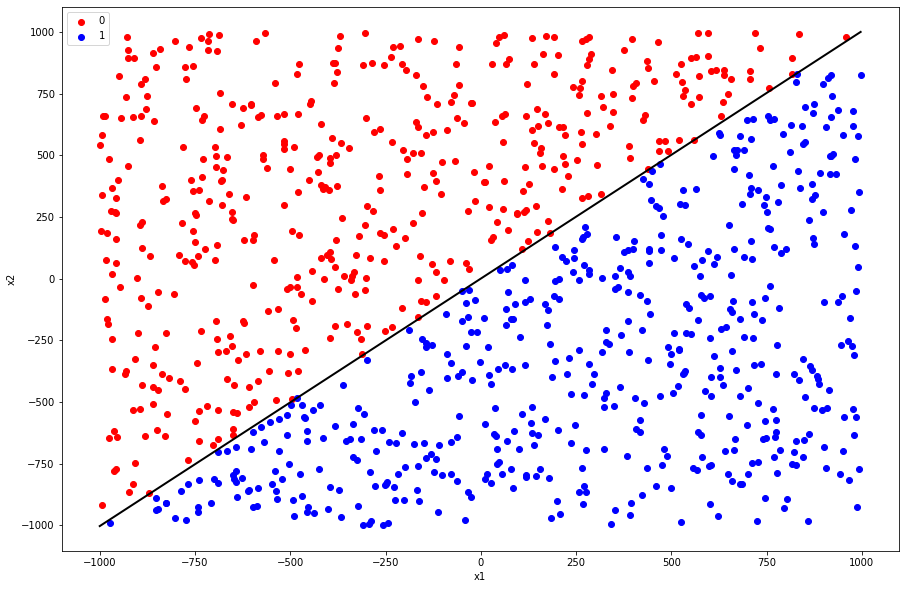

In [120]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []



for example in df:
   
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(np.min(df[:,:1]),np.max(df[:,:1]), 0.1)
slp = -(weight[0]/weight[2])
plt.plot(x,  slp - (weight[1]/weight[2]*x), 'k', linewidth=2)



'''end = (weight[0]/weight[2])
abline_values = [slp * i + end for i in x_classe0]
plt.plot(x_classe0, abline_values, 'b',color="black")'''

plt.show()

#Parte II – Executando


In [121]:
x = 12%4
print(x)

0


In [122]:
df0 = np.fromfile('/content/Atividade_avaliativa-2.1-RNA/data/data0.txt')
print(df0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


In [123]:
df0.shape

(1800,)

In [124]:
df0 = df0.reshape(600, 3)
print(df0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


In [125]:
import numpy as np

class Perceptron(object):
    
   def __init__(self, no_of_inputs, epoch=100, 
                    learning_rate=np.random.uniform(0.1, 0.4, 1), 
                    baias=-1, 
                    random_train_set=False, 
                    show_training=False,
                    weights=(-5.0, 0.5),
                    use_epoch=False):
        self.epoch = epoch
        self.learning_rate= learning_rate
        self.weights = np.random.uniform(weights[0], 
                                            weights[1], 
                                            no_of_inputs + 1)
        self.baias = baias
        self.random_train_set = random_train_set
        self.show_training = show_training
        self.use_epoch = use_epoch
    
   def __add_baias(self, inputs):
        new_inputs = []
        for row in inputs:
            new_row = np.insert(row, 0, self.baias)
            new_inputs.append(new_row)
        return np.array(new_inputs)

   def __weight_adjust(self, x_train, y_predicto, y_real):
        erro = y_predicto - y_real
        self.weights -= self.learning_rate * erro * x_train
        self.weights = np.round(self.weights, 4)

   def __activ_func(self, u): 
        if u >= 0.0:
            return 1.0
        else:
            return 0.0

   def __error(self, y_predicto, y_real):
        if y_predicto != y_real:
            return True
        else:
            return False

   def __random_sets(self, x_train, y_train):
        # Randomizando os dados de treino
        index = np.arange(len(x_train))
        np.random.shuffle(index)
        x_train = x_train[index]
        y_train = y_train[index]
        return x_train, y_train
        #---------------------------------
    
   def predict(self, x_test):
        x_test = self.__add_baias(x_test)
        y_predicto = []
        for _x_test in x_test:
            u = np.sum(np.dot(_x_test, self.weights))
            y = self.__activ_func(u)
            y_predicto.append(y)
        return np.array(y_predicto)

   def __show_training(self, epoch, count_adjust):
        print("\n\tÉpoca:", epoch)
        print("Pesos:", self.weights)
        print("Quantidade de Ajustes:", count_adjust)

   def __learning(self, x_train, y_train, no_erro):
        count_adjust = 0
        for x, y in zip(x_train, y_train):
            u = np.sum(np.dot(x, self.weights))
            y_predicto = self.__activ_func(u)
            if self.__error(y_predicto, y):
                self.__weight_adjust(x, y_predicto, y)
                no_erro = False
                count_adjust += 1
        return no_erro, count_adjust


   def __epochs(self, x_train, y_train):
        no_erro = False
        epoch = 1
        total_adjust = 0
        while no_erro != True:

            if self.use_epoch:
                if epoch == self.epoch:
                    break
                
            if self.random_train_set:
                x_train, y_train = self.__random_sets(x_train,
                                                         y_train)
            
            no_erro = True
            
            no_erro, count_adjust = self.__learning(x_train, 
                                                        y_train,
                                                        no_erro)

            if self.show_training:
                self.__show_training(epoch, count_adjust)

            epoch += 1
            total_adjust += count_adjust
        return epoch, total_adjust


   def total_values(self, x_train, y_train):

        x_train = self.__add_baias(x_train)
        epoch, total_adjust = self.__epochs(x_train, y_train)
        return epoch, total_adjust

#Função para Gerar Valores dos Pesos

In [126]:
weight_max_1 = 100
weight_min_1 = -100
weight_max_2 = 0.5
weight_min_2 = -0.5

def new_weights():
  weight_max_1 = 100
  weight_min_1 = -100
  weights_1 = random_weights(weight_min_1, weight_max_1)
  print("Peso 1: ", weights_1)
  
  weight_max_2 = 0.5
  weight_min_2 = -0.5
  weights_2 = random_weights(weight_min_2, weight_max_2)
  print("Peso 2: ", weights_2)
  return weights_1, weights_2


#Calculo dos pesos para as configs. 1 e 2


In [127]:
weights_1, weights_2 = new_weights()



Peso 1:  [-80.7721  85.0292  62.6943]
Peso 2:  [ 0.1327  0.3879 -0.2721]


#Configuração 1
Valor da taxa de aprendizado: 0.4<br>
Peso: wi ∼ U(-100, +100)

In [128]:
taxa_aprendizado = 0.4

In [129]:
epocas = []
ajustes = []

for i in range(1, 11):
    perceptron = Perceptron(no_of_inputs=2, learning_rate=taxa_aprendizado, weights=weights_1)
    treinamento_x = df0[:,[0,1]]
    treinamento_y = df0[:,2]    
    qtd_epocas, qtd_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, qtd_epocas)
    ajustes = np.append(ajustes, qtd_ajustes) 

def set_valores_media(values):
  var = np.mean(values)
  var = np.round(var,4)
  return var

def set_valores_desvio_padrao(values):
  var = np.std(values)
  var = np.round(var,4)
  return var

epocas_1 = epocas
ajustes_1 = ajustes
menor_qtde_epocas_1 = int(epocas_1.min())
ajustes_media_1 = set_valores_media(ajustes_1)
ajustes_desvio_padrao_1 = set_valores_desvio_padrao(ajustes_1)

print("Menor quantidade de épocas: ", menor_qtde_epocas_1)
print("Medias: Ajustes = ", ajustes_media_1, "\nDesvios Padrao: Ajustes = ", ajustes_desvio_padrao_1)

Menor quantidade de épocas:  3
Medias: Ajustes =  168.3 
Desvios Padrao: Ajustes =  127.6253


In [130]:
weights = perceptron.weights
print(weights)


[  7.7067 -10.9267  25.7622]


**Gráfico do conjunto de dados e a reta que separa as classes**

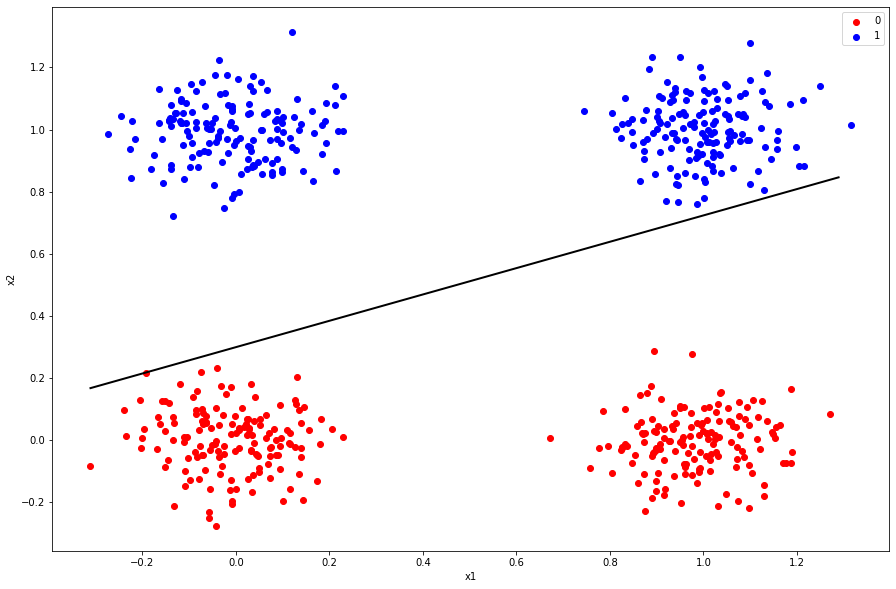

In [131]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []
max = 0
min = 0

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")


x = np.arange(np.min(df0[:,:1]),np.max(df0[:,:1]), 0.1)
slp =(weights[0]/weights[2])
plt.plot(x,slp- (weights[1]/weights[2]*x), 'k', linewidth=2)

plt.plot()
plt.show()

#Configuração 2
Valor da taxa de aprendizado: 0.4<br>
Peso: wi ∼ U(-0.5, +0.5)

In [132]:
epocas = []
ajustes = []

for i in range(1, 11):
    perceptron = Perceptron(no_of_inputs=2, learning_rate=taxa_aprendizado, weights=weights_2)
    treinamento_x = df0[:,[0,1]]
    treinamento_y = df0[:,2]    
    qtd_epocas, qtd_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, qtd_epocas)
    ajustes = np.append(ajustes, qtd_ajustes) 

def set_valores_media(values):
  var = np.mean(values)
  var = np.round(var,4)
  return var

def set_valores_desvio_padrao(values):
  var = np.std(values)
  var = np.round(var,4)
  return var

epocas_2 = epocas
ajustes_2 = ajustes
menor_qtde_epocas_2 = int(epocas_2.min())
ajustes_media_2 = set_valores_media(ajustes_2)
ajustes_desvio_padrao_2 = set_valores_desvio_padrao(ajustes_2)

print("Menor quantidade de épocas: ", menor_qtde_epocas_2)
print("Medias: Ajustes = ", ajustes_media_2, "\nDesvios Padrao: Ajustes = ", ajustes_desvio_padrao_2)

Menor quantidade de épocas:  3
Medias: Ajustes =  4.2 
Desvios Padrao: Ajustes =  2.8914


In [133]:
weights = perceptron.weights
print(weights)

[ 0.2584 -0.0166  0.5572]


Gráfico do conjunto de dados e a reta que separa as classes

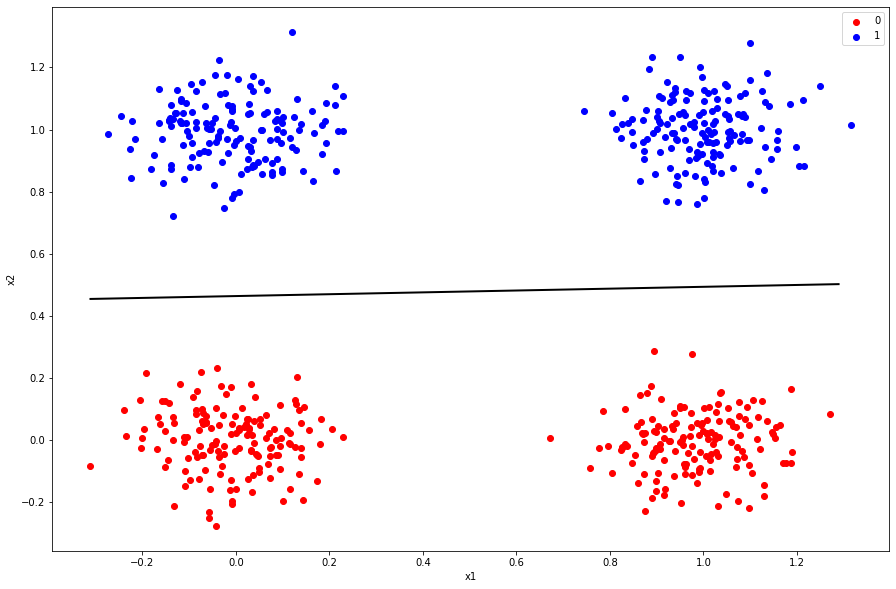

In [134]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []
max = 0
min = 0

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(np.min(df0[:,:1]),np.max(df0[:,:1]), 0.1)
slp =(weights[0]/weights[2])
plt.plot(x,slp- (weights[1]/weights[2]*x), 'k', linewidth=2)

plt.plot()

plt.show()

#Calculo dos pesos para as configs. 3 e 4


In [135]:
weights_1, weights_2 = new_weights()

Peso 1:  [-82.639  -60.1104  11.1075]
Peso 2:  [-0.0341  0.315  -0.3893]


#Configuração 3
Valor da taxa de aprendizado: 0.1<br>
Peso: wi ∼ U(-100, +100)

In [136]:
taxa_aprendizado = 0.1

In [137]:
epocas = []
ajustes = []

for i in range(1, 11):
    perceptron = Perceptron(no_of_inputs=2, learning_rate=taxa_aprendizado, weights=weights_1)
    treinamento_x = df0[:,[0,1]]
    treinamento_y = df0[:,2]    
    qtd_epocas, qtd_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, qtd_epocas)
    ajustes = np.append(ajustes, qtd_ajustes) 

def set_valores_media(values):
  var = np.mean(values)
  var = np.round(var,4)
  return var

def set_valores_desvio_padrao(values):
  var = np.std(values)
  var = np.round(var,4)
  return var

epocas_3 = epocas
ajustes_3 = ajustes
menor_qtde_epocas_3 = int(epocas_3.min())
ajustes_media_3 = set_valores_media(ajustes_3)
ajustes_desvio_padrao_3 = set_valores_desvio_padrao(ajustes_3)

print("Menor quantidade de épocas: ", menor_qtde_epocas_3)
print("Medias: Ajustes = ", ajustes_media_3, "\nDesvios Padrao: Ajustes = ", ajustes_desvio_padrao_3)

Menor quantidade de épocas:  30
Medias: Ajustes =  2516.7 
Desvios Padrao: Ajustes =  160.1094


In [138]:
weights = perceptron.weights
print(weights)

[ 5.2951 -7.5581 17.3853]


Gráfico do conjunto de dados e a reta que separa as classes

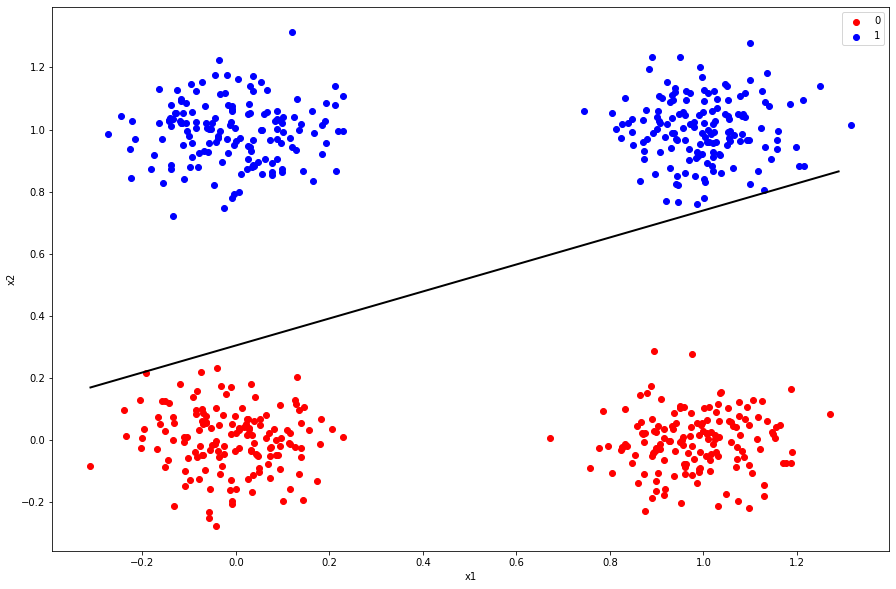

In [139]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []
max = 0
min = 0

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
        classe0.append(example[0])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        classe0.append(example[0])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(np.min(df0[:,:1]),np.max(df0[:,:1]), 0.1)
slp =(weights[0]/weights[2])
plt.plot(x,slp- (weights[1]/weights[2]*x), 'k', linewidth=2)

plt.plot()
plt.show()

#Configuração 4
Valor da taxa de aprendizado: 0.1<br>
Peso: wi ∼ U(-0.5, +0.5)

In [140]:
epocas = []
ajustes = []

for i in range(1, 11):
    perceptron = Perceptron(no_of_inputs=2, learning_rate=taxa_aprendizado, weights=weights_1)
    treinamento_x = df0[:,[0,1]]
    treinamento_y = df0[:,2]    
    qtd_epocas, qtd_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, qtd_epocas)
    ajustes = np.append(ajustes, qtd_ajustes) 

def set_valores_media(values):
  var = np.mean(values)
  var = np.round(var,4)
  return var

def set_valores_desvio_padrao(values):
  var = np.std(values)
  var = np.round(var,4)
  return var

epocas_4 = epocas
ajustes_4 = ajustes
menor_qtde_epocas_4 = int(epocas_4.min())
ajustes_media_4 = set_valores_media(ajustes_4)
ajustes_desvio_padrao_4 = set_valores_desvio_padrao(ajustes_4)

print("Menor quantidade de épocas: ", menor_qtde_epocas_4)
print("Medias: Ajustes = ", ajustes_media_4, "\nDesvios Padrao: Ajustes = ", ajustes_desvio_padrao_4)

Menor quantidade de épocas:  28
Medias: Ajustes =  2535.1 
Desvios Padrao: Ajustes =  108.5168


In [141]:
weights = perceptron.weights
print(weights)

[ 5.0524 -7.3944 16.7106]


Gráfico do conjunto de dados e a reta que separa as classes

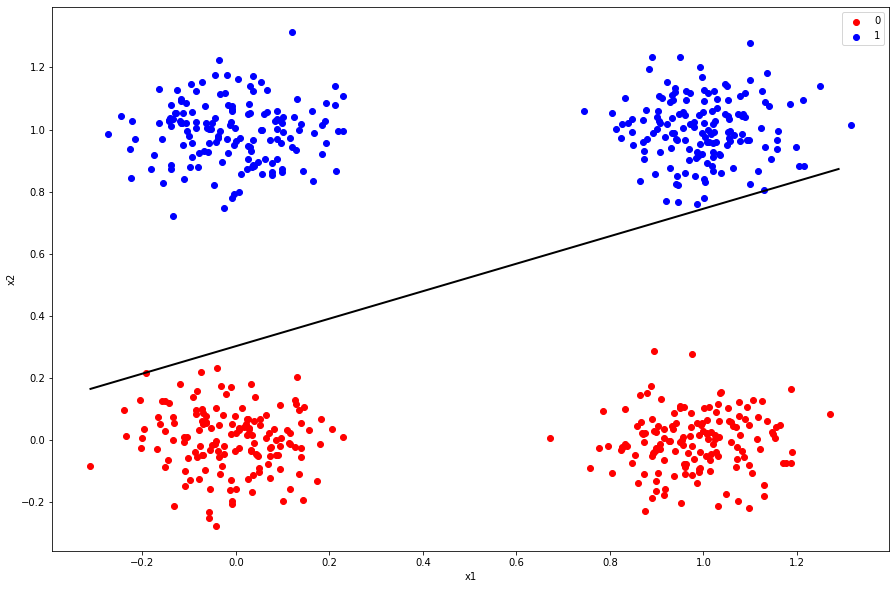

In [142]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []
max = 0
min = 0

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")


x = np.arange(np.min(df0[:,:1]),np.max(df0[:,:1]), 0.1)
slp =(weights[0]/weights[2])
plt.plot(x,slp- (weights[1]/weights[2]*x), 'k', linewidth=2)

plt.plot()
plt.show()

#Calculo dos pesos para as configs. 5 e 6


In [143]:
weights_1, weights_2 = new_weights()

Peso 1:  [-95.2844  -9.5848  37.9854]
Peso 2:  [-0.4959  0.1958 -0.3042]


#Configuração 5
Valor da taxa de aprendizado: 0.01<br>
Peso: wi ∼ U(-100, +100)

In [144]:
taxa_aprendizado = 0.01

In [145]:
epocas = []
ajustes = []

for i in range(1, 11):
    perceptron = Perceptron(no_of_inputs=2, learning_rate=taxa_aprendizado, weights=weights_1)
    treinamento_x = df0[:,[0,1]]
    treinamento_y = df0[:,2]    
    qtd_epocas, qtd_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, qtd_epocas)
    ajustes = np.append(ajustes, qtd_ajustes) 

def set_valores_media(values):
  var = np.mean(values)
  var = np.round(var,4)
  return var

def set_valores_desvio_padrao(values):
  var = np.std(values)
  var = np.round(var,4)
  return var

epocas_5 = epocas
ajustes_5 = ajustes
menor_qtde_epocas_5 = int(epocas_5.min())
ajustes_media_5 = set_valores_media(ajustes_5)
ajustes_desvio_padrao_5 = set_valores_desvio_padrao(ajustes_5)

print("Menor quantidade de épocas: ", menor_qtde_epocas_5)
print("Medias: Ajustes = ", ajustes_media_5, "\nDesvios Padrao: Ajustes = ", ajustes_desvio_padrao_5)

Menor quantidade de épocas:  74
Medias: Ajustes =  21038.5 
Desvios Padrao: Ajustes =  5600.4068


In [146]:
weights = perceptron.weights
print(weights)

[ 2.5294 -3.7503  8.4015]


Gráfico do conjunto de dados e a reta que separa as classes

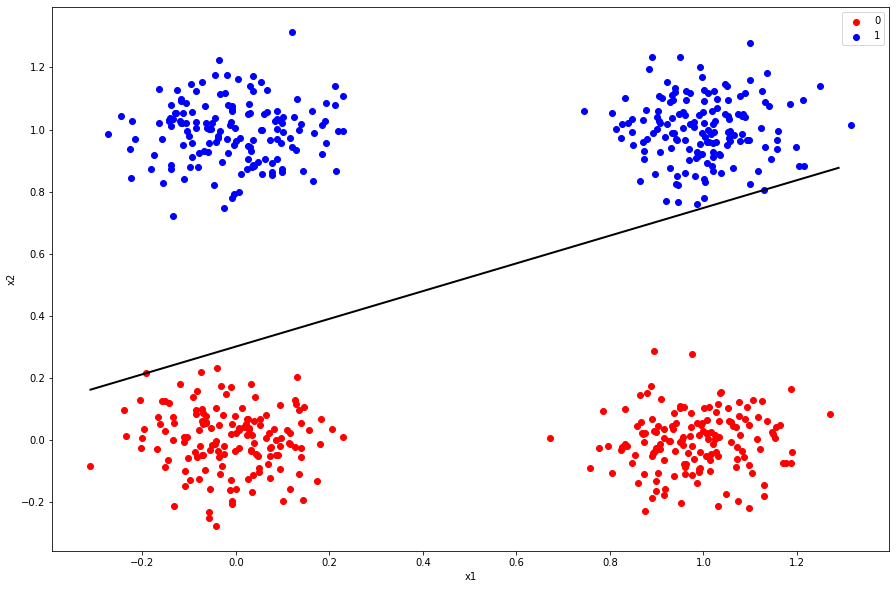

In [147]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []
max = 0
min = 0

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(np.min(df0[:,:1]),np.max(df0[:,:1]), 0.1)
slp =(weights[0]/weights[2])
plt.plot(x,slp- (weights[1]/weights[2]*x), 'k', linewidth=2)

plt.plot()

plt.show()

#Configuração 6
Valor da taxa de aprendizado: 0.01<br>
Peso: wi ∼ U(-0.5, +0.5)

In [148]:
epocas = []
ajustes = []

for i in range(1, 11):
    perceptron = Perceptron(no_of_inputs=2, learning_rate=taxa_aprendizado, weights=weights_1)
    treinamento_x = df0[:,[0,1]]
    treinamento_y = df0[:,2]    
    qtd_epocas, qtd_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, qtd_epocas)
    ajustes = np.append(ajustes, qtd_ajustes) 

def set_valores_media(values):
  var = np.mean(values)
  var = np.round(var,4)
  return var

def set_valores_desvio_padrao(values):
  var = np.std(values)
  var = np.round(var,4)
  return var

epocas_6 = epocas
ajustes_6 = ajustes
menor_qtde_epocas_6 = int(epocas_6.min())
ajustes_media_6 = set_valores_media(ajustes_6)
ajustes_desvio_padrao_6 = set_valores_desvio_padrao(ajustes_6)

print("Menor quantidade de épocas: ", menor_qtde_epocas_6)
print("Medias: Ajustes = ", ajustes_media_6, "\nDesvios Padrao: Ajustes = ", ajustes_desvio_padrao_6)

Menor quantidade de épocas:  144
Medias: Ajustes =  21401.1 
Desvios Padrao: Ajustes =  5672.3202


In [149]:
weights = perceptron.weights
print(weights)

[ 4.7648 -7.0702 15.8129]


Gráfico do conjunto de dados e a reta que separa as classes

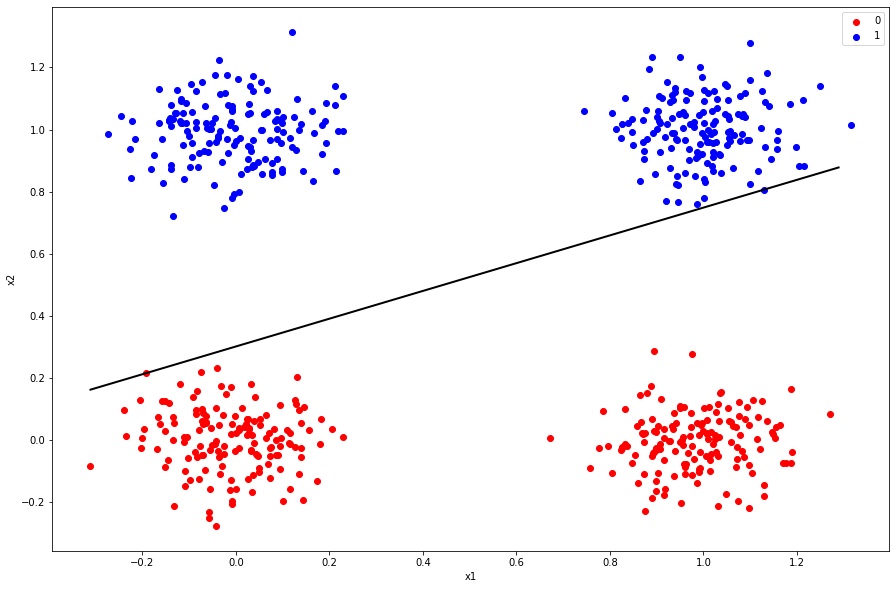

In [150]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []
max = 0
min = 0

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(np.min(df0[:,:1]),np.max(df0[:,:1]), 0.1)
slp =(weights[0]/weights[2])
plt.plot(x,slp- (weights[1]/weights[2]*x), 'k', linewidth=2)

plt.plot()

plt.show()

#Tabela de Resultados Gerais

In [151]:
from prettytable import PrettyTable
t = PrettyTable()
var_peso_1 = str(weight_min_1)+"-->"+str(weight_max_1)
var_peso_2 = str(weight_min_2)+"-->"+str(weight_max_2)
t.field_names = ["Taxa de aprendizado", "Intervalo de pesos", "Media de Ajustes", "Desvio Padrao de Ajustes", "Menor No de Epocas para Convergencia"]
t.add_row([0.4,var_peso_1, ajustes_media_1, ajustes_desvio_padrao_1, menor_qtde_epocas_1])
t.add_row([0.4,var_peso_2, ajustes_media_2, ajustes_desvio_padrao_2, menor_qtde_epocas_2])
t.add_row([0.1,var_peso_1, ajustes_media_3, ajustes_desvio_padrao_3, menor_qtde_epocas_3])
t.add_row([0.1,var_peso_2, ajustes_media_4, ajustes_desvio_padrao_4, menor_qtde_epocas_4])
t.add_row([0.01,var_peso_1, ajustes_media_5, ajustes_desvio_padrao_5, menor_qtde_epocas_5])
t.add_row([0.01,var_peso_2, ajustes_media_6, ajustes_desvio_padrao_6, menor_qtde_epocas_6])

print (t)

+---------------------+--------------------+------------------+--------------------------+--------------------------------------+
| Taxa de aprendizado | Intervalo de pesos | Media de Ajustes | Desvio Padrao de Ajustes | Menor No de Epocas para Convergencia |
+---------------------+--------------------+------------------+--------------------------+--------------------------------------+
|         0.4         |     -100-->100     |      168.3       |         127.6253         |                  3                   |
|         0.4         |     -0.5-->0.5     |       4.2        |          2.8914          |                  3                   |
|         0.1         |     -100-->100     |      2516.7      |         160.1094         |                  30                  |
|         0.1         |     -0.5-->0.5     |      2535.1      |         108.5168         |                  28                  |
|         0.01        |     -100-->100     |     21038.5      |        5600.4068         |

#Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [152]:
df_holdout = np.fromfile('/content/Atividade_avaliativa-2.1-RNA/data/dataHoldout.txt')
print(df)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


In [153]:
df_holdout.shape

(2400,)

In [154]:
df_holdout = df_holdout.reshape(800, 3)
print(df)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]




#Gráfico Inicial








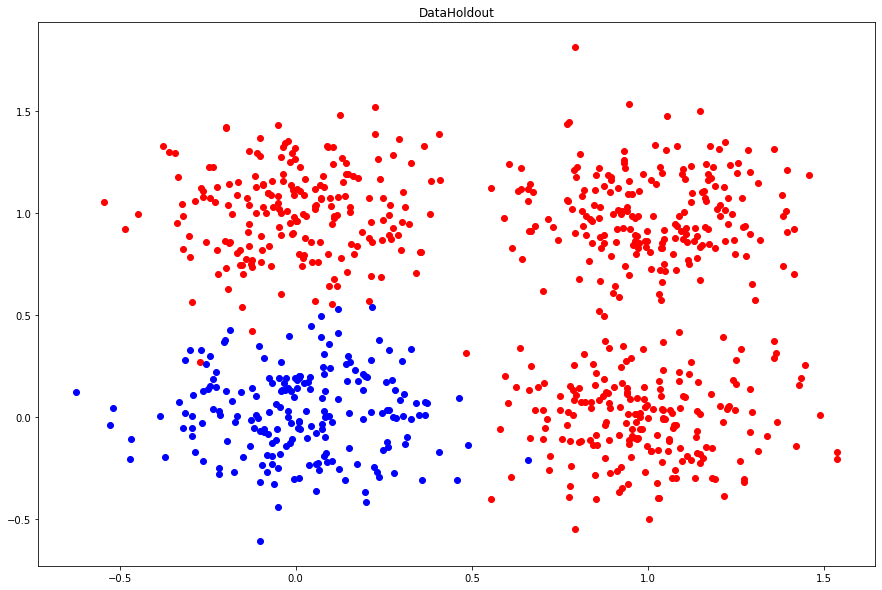

In [155]:
x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

plt.figure(figsize=(15,10))
for example in df_holdout:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
plt.title('DataHoldout')
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')
plt.plot()
plt.show()

#Separando os dados em duas partições: Teste e Treinamento

In [156]:
random.shuffle(df_holdout)

X = df_holdout[: , :2]
y = df_holdout[:,2:]

X_train = X[:int(len(x)*0.7)]
X_test = X[int(len(x)*0.7):]

y_train = y[:int(len(y)*0.7)]
y_test = y[int(len(y)*0.7):]


#Configuração do Holdout


In [157]:
epocas = []
ajustes = []

for i in range(1, 2):
    perceptron = Perceptron(no_of_inputs=2, random_train_set=True)
    treinamento_x = X_train
    treinamento_y = y_train 
    qtd_epocas, qtd_ajustes = perceptron.total_values(treinamento_x, treinamento_y)
    epocas = np.append(epocas, qtd_epocas)
    ajustes = np.append(ajustes, qtd_ajustes) 

def set_valores_media(values):
  var = np.mean(values)
  var = np.round(var,4)
  return var

def set_valores_desvio_padrao(values):
  var = np.std(values)
  var = np.round(var,4)
  return var

epocas_h = epocas
ajustes_h = ajustes
menor_qtde_epocas_h = int(epocas_h.min())
ajustes_media_h = set_valores_media(ajustes_h)
ajustes_desvio_padrao_h = set_valores_desvio_padrao(ajustes_h)

print("Menor quantidade de épocas: ", menor_qtde_epocas_h)
print("Medias: Ajustes = ", ajustes_media_h, "\nDesvios Padrao: Ajustes = ", ajustes_desvio_padrao_h)

Menor quantidade de épocas:  2
Medias: Ajustes =  0.0 
Desvios Padrao: Ajustes =  0.0


In [158]:
weights = perceptron.weights
print(weights)

[-3.23183922 -2.1315104  -4.58709322]


Gráfico do conjunto de dados e a reta que separa as classes

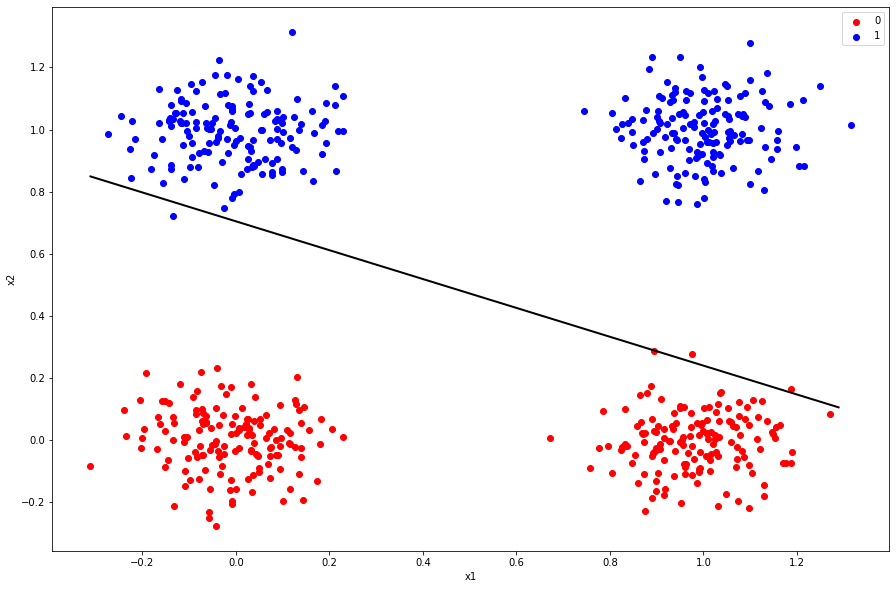

In [159]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []
max = 0
min = 0

for example in df0:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(np.min(df0[:,:1]),np.max(df0[:,:1]), 0.1)
slp =(weights[0]/weights[2])
plt.plot(x,slp- (weights[1]/weights[2]*x), 'k', linewidth=2)

plt.plot()

plt.show()